In [2]:
import pandas as pd

# Section 1: Dataset


I chose a dataset of the top 550 bestselling books on Amazon from the years 2009-2019. I enjoy reading in my freetime, and I know many people purchase books using Amazon. I'm curious to see what books were most popular for that span of time. I found this dataset on kaggle. I want to use data science to analyze trends involving the user ratings, reviews, price, and genre of different books.

In [3]:
df = pd.read_csv('bestsellers_with_categories.csv')
# I cleaned the data to remove books with prices of 0, which his might have been due to promotions or missing data
df = df[df['Price'] > 0]
df = df.dropna()
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [4]:
df.dtypes

Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object

In [5]:
#Number of rows and columns
df.shape


(538, 7)

In [6]:
#Names of columns
df.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

# Section 2: Exploratory Data Analysis

Some of the descriptive statistics using the df.describe() function can help give a broad overview of the data, like  mean, std, min, 25%, 50%, 75%, and max. The mean can help give an overview of the average value for the User Rating, Reviews, Price, and Year columns. The std column helps describe how spread out the data is. The 50% row shows me the median user rating (4.6 stars), reviews (8580), price for bestselling books ($11), and the median year 2014 (which makes sense because the dataset is from 2009-2019).

In [7]:
df.describe()

,User Rating,Reviews,Price,Year
count,538.000000,538.000000,538.000000,538.000000
mean,4.615056,11971.776952,13.392193,2014.001859
std,0.228052,11750.508068,10.782447,3.187206
min,3.300000,37.000000,1.000000,2009.000000
25%,4.500000,4173.500000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17030.500000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


I used the nlargest function to find the 20 books wihth the highest user ratings. I found that many children's books seem to have the highest user ratings. 

In [8]:
#For this specific analysis, I dropped the year and price columns because there were some duplicates of the same title with different years and prices
df1 = df.drop(columns = ["Year"])
# I named the below dataframe df_price so I can use it later when analyzing price while avoiding duplicate titles
df_price = df1.drop_duplicates()
df3 = df_price.drop(columns = "Price")
#I named the below dataframe df_reviews so I can use it when analyzing reviews while avoiding duplicate titles
df_reviews= df3.drop_duplicates()
df_reviews.nlargest(20,'User Rating')

,Name,Author,User Rating,Reviews,Genre
40,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,Fiction
81,Dog Man and Cat Kid: From the Creator of Capta...,Dav Pilkey,4.9,5062,Fiction
82,Dog Man: A Tale of Two Kitties: From the Creat...,Dav Pilkey,4.9,4786,Fiction
83,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235,Fiction
85,Dog Man: Fetch-22: From the Creator of Captain...,Dav Pilkey,4.9,12619,Fiction
86,Dog Man: For Whom the Ball Rolls: From the Cre...,Dav Pilkey,4.9,9089,Fiction
87,Dog Man: Lord of the Fleas: From the Creator o...,Dav Pilkey,4.9,5470,Fiction
146,"Goodnight, Goodnight Construction Site (Hardco...",Sherri Duskey Rinker,4.9,7038,Fiction
151,Hamilton: The Revolution,Lin-Manuel Miranda,4.9,5867,Non Fiction
153,Harry Potter and the Chamber of Secrets: The I...,J.K. Rowling,4.9,19622,Fiction



I analyzed the dataset to identify the books with the most reviews, revealing more young adult titles. 

In [9]:
df_reviews.nlargest(20,'Reviews')

,Name,Author,User Rating,Reviews,Genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,Fiction
382,The Girl on the Train,Paula Hawkins,4.1,79446,Fiction
32,Becoming,Michelle Obama,4.8,61133,Non Fiction
135,Gone Girl,Gillian Flynn,4.0,57271,Fiction
365,The Fault in Our Stars,John Green,4.7,50482,Fiction
437,The Nightingale: A Novel,Kristin Hannah,4.8,49288,Fiction
106,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,Fiction
433,The Martian,Andy Weir,4.7,39459,Fiction
20,All the Light We Cannot See,Anthony Doerr,4.6,36348,Fiction
338,The Alchemist,Paulo Coelho,4.7,35799,Fiction


I used the groupby function to see how many books of each genre there were. I found out there were more nonfiction books.

In [10]:
#I used df_reviews here to remove duplicates as I was not analyzing data related to price and year, only genre
dfgenre = df_reviews.groupby("Genre").agg("count").reset_index()
dfgenre

,Genre,Name,Author,User Rating,Reviews
0,Fiction,153,153,153,153
1,Non Fiction,191,191,191,191


I used the nlargest function to find the bestsellers with the highest price. 

In [11]:
#I used df_price to avoid duplicates with the same year while keeping the price column
df_price.nlargest(20,"Price")

,Name,Author,User Rating,Reviews,Price,Genre
69,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,Non Fiction
473,The Twilight Saga Collection,Stephenie Meyer,4.7,3801,82,Fiction
151,Hamilton: The Revolution,Lin-Manuel Miranda,4.9,5867,54,Non Fiction
346,The Book of Basketball: The NBA According to T...,Bill Simmons,4.7,858,53,Non Fiction
159,Harry Potter Paperback Box Set (Books 1-7),J. K. Rowling,4.8,13471,52,Fiction
271,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,Non Fiction
524,Watchmen,Alan Moore,4.8,3829,42,Fiction
439,The Official SAT Study Guide,The College Board,4.4,1201,40,Non Fiction
338,The Alchemist,Paulo Coelho,4.7,35799,39,Fiction
444,"The Official SAT Study Guide, 2016 Edition (Of...",The College Board,4.3,807,36,Non Fiction


I did the same with the lowest-priced bestsellers.

In [12]:

df_price.nsmallest(20,'Price')

,Name,Author,User Rating,Reviews,Price,Genre
91,Eat This Not That! Supermarket Survival Guide:...,David Zinczenko,4.5,720,1,Non Fiction
11,A Patriot's History of the United States: From...,Larry Schweikart,4.6,460,2,Non Fiction
103,Fear: Trump in the White House,Bob Woodward,4.4,6042,2,Non Fiction
264,Percy Jackson and the Olympians Paperback Boxe...,Rick Riordan,4.8,548,2,Fiction
388,The Girl with the Dragon Tattoo (Millennium Se...,Stieg Larsson,4.4,10559,2,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,Non Fiction
15,Adult Coloring Book Designs: Stress Relief Col...,Adult Coloring Book Designs,4.5,2313,4,Non Fiction
43,Calm the F*ck Down: An Irreverent Adult Colori...,Sasha O'Hara,4.6,10369,4,Non Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,Non Fiction
60,Dead And Gone: A Sookie Stackhouse Novel (Sook...,Charlaine Harris,4.6,1541,4,Fiction


# Section 3: Exploratory Data Visualization

I was curious to see the spread of the number of reviews each book has, so I created a boxplot with this data. I found the median number of reviews for a bestselling book on Amazon is ~9000.

<Axes: title={'center': 'Distribution of Reviews'}, xlabel='Number of Reviews', ylabel='Reviews'>

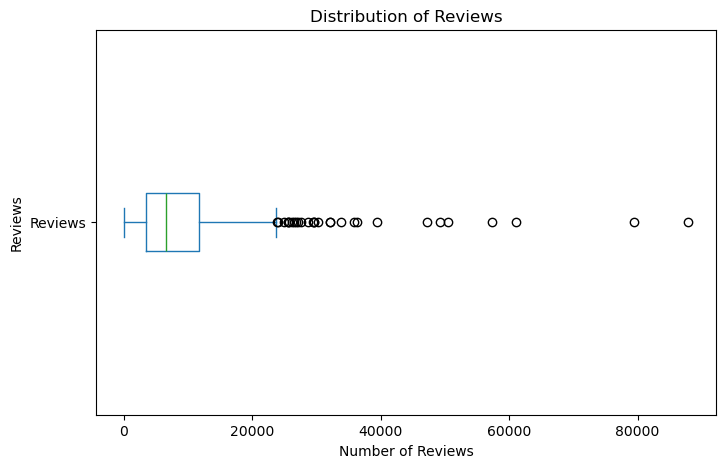

In [13]:
reviews= df_reviews["Reviews"].plot.box(vert=False,xlabel="Number of Reviews", ylabel="Reviews",figsize=(8,5),title="Distribution of Reviews")
reviews


I did the same with price, and found that the 50th percentile is ~$15.

<Axes: title={'center': 'Distribution of Prices'}, xlabel='Dollars', ylabel='Price'>

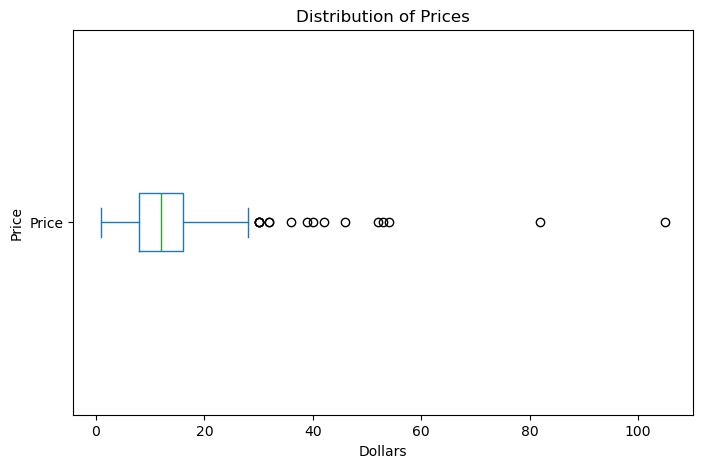

In [14]:
price= df_price["Price"].plot.box(vert=False, xlabel="Dollars",ylabel="Price",figsize=(8,5),title="Distribution of Prices")
price


I was curious to see if there is a correlation between the rating a book has and the amount of reviews it has, and found that books reviewed at a higher frequency tend to have higher user ratings.

<Axes: title={'center': 'Book Rating Frequency'}, xlabel='User Rating', ylabel='Frequency'>

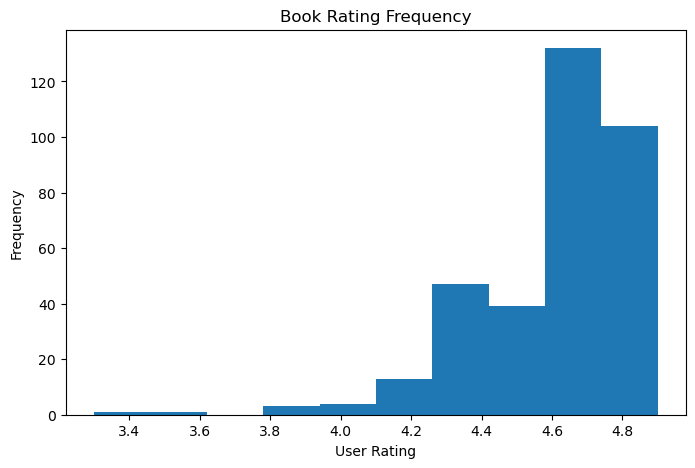

In [15]:
df_reviews['User Rating'].plot.hist(xlabel="User Rating",ylabel="Frequency",figsize=(8,5),title="Book Rating Frequency")

I wanted to see if there is a difference in the total amount of reviews for fiction and nonfiction books. While there are more nonfiction books in this dataset, I found that fiction books have more reviews.

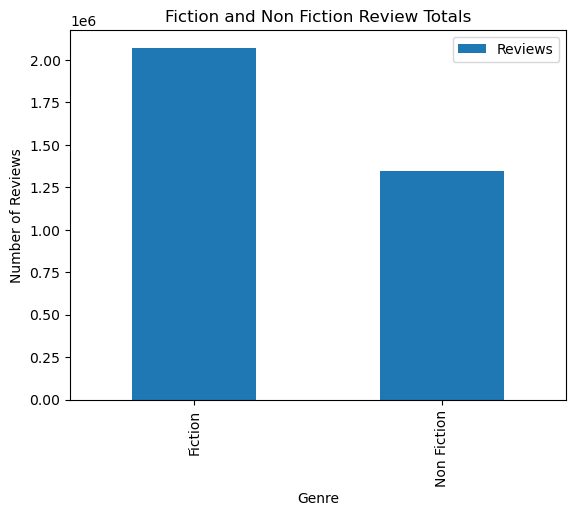

In [16]:
dfgenre = df_reviews.groupby("Genre").agg("sum",numeric_only=True).reset_index()
genreplot = dfgenre.plot.bar(x="Genre",xlabel="Genre",y="Reviews",ylabel="Number of Reviews", title = "Fiction and Non Fiction Review Totals")

I did the same thing with user ratings instead of reviews and found that nonfiction books have a greater sum of user ratings.

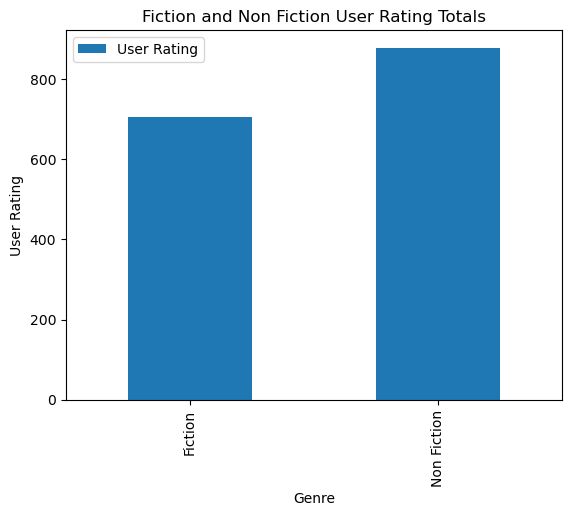

In [17]:
genreplot2 = dfgenre.plot.bar(x="Genre",xlabel="Genre",y="User Rating",ylabel="User Rating", title = "Fiction and Non Fiction User Rating Totals")

Using a scatterplot, I found that most books in this bestsellers dataset have 25,000 or less reviews and are ~$20 or under. I found that books with a higher number of reviews tend to be priced lower.

<Axes: title={'center': 'Price and Number of Reviews'}, xlabel='Price', ylabel='Reviews'>

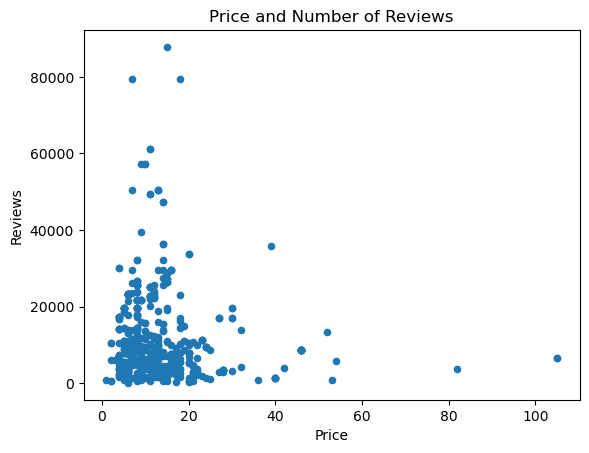

In [18]:
df.plot.scatter(x="Price",xlabel="Price",y="Reviews",ylabel="Reviews",title="Price and Number of Reviews")


Finally, I created a plot showing the total sum of the prices bestsellers in a year compared to the year to show how prices of bestsellers on Amazon have changed.

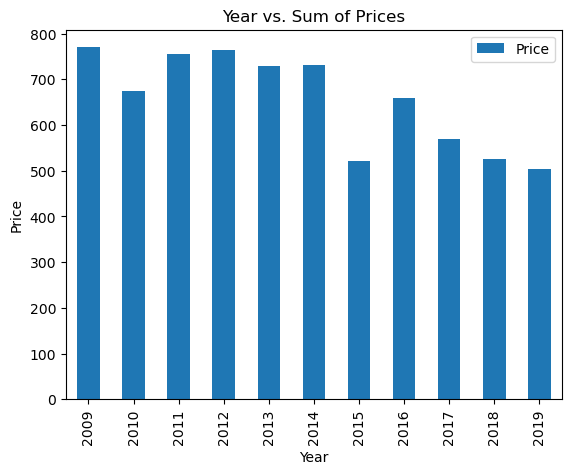

In [19]:
pricesum = df.groupby("Year").agg("sum",numeric_only=True).reset_index()
pricesum
plot3 = pricesum.plot.bar(x="Year", xlabel="Year",y="Price",ylabel = "Price", title = "Year vs. Sum of Prices")

# Section 4: Planning For Part 2

Some observations that I've made are that children fiction's books tend to have higher ratings, young adult books tend to have more reviews,books with higher ratings tend to have a larger number of reviews, and that books with large amounts of reviews tend to be priced under $20.

Some ideas I have for questions are: Can we predict the year a book was sold based on its price? Can we predict the genre of a book based on its user ratings, price, and/or reviews? Can we predict the price of a book based on its ratings?

# Section 5: Data Science 

I answering the question "Can the price of a book be predicted based on the year it was sold and its genre?" This is a different question than my previous brainstormed questions, and I'm answering it because it is something I am curious about. I plan on using Linear Regression to answer this question.

In [20]:

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model = model.fit( df[ ["Year"] ],df["Price"]  )
data = []
data.append( {"Year": 2015,})
df1 = pd.DataFrame(data)
df1["predict"] = model.predict( df1 )
df1



,Year,predict
0,2015,12.858925


I am also curious to see if I can predict the price of a book based on its year, so I am going to use Linear Regression to answer this question.

In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model = model.fit( df[ ["Price"] ],df["Year"]  )
data = []
data.append( {"Price": 20,})
df2 = pd.DataFrame(data)
df2["predict"] = model.predict( df2 )
df2


,Price,predict
0,20,2013.693401


# Section 6: A Different Data Visualization

This visualization shows a scatterplot with a line of best fit for the genre and price using seaborn.

Text(0.5, 1.0, 'Year vs. Price')

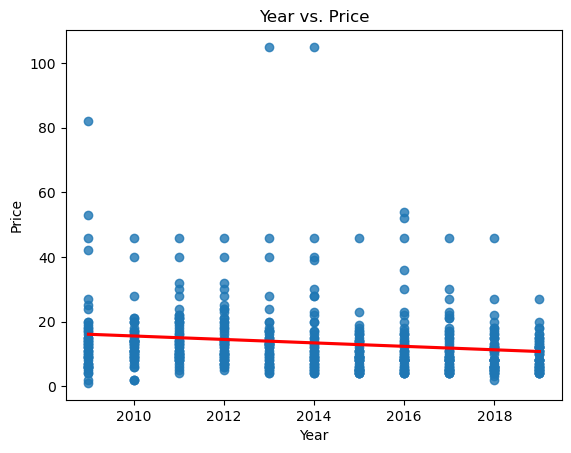

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(data=df, x="Year", y="Price", ci=None, line_kws={'color':'red'})
plt.title("Year vs. Price")

This visualization is a bar plot that shows the genre of books versus the sum prices for that genre. It shows that Non Fiction has a higher sum of prices than fiction.

<Axes: title={'center': 'Genre vs. Sum of Prices'}, xlabel='Genre', ylabel='Price'>

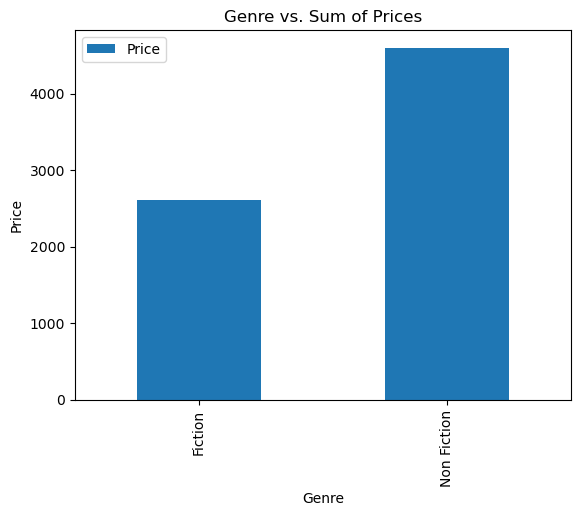

In [33]:
genre = df.groupby("Genre").agg("sum").reset_index()
plot4 = genre.plot.bar(x="Genre", xlabel="Genre",y="Price",ylabel = "Price", title = "Genre vs. Sum of Prices")
plot4

# Section 7: Summary

My dataset is about different bestselling Fiction and Non-Fiction books on Amazon from the years 2009-2019. Through Exploratory Data Analysis, I found out that children's books tend to have the highest user ratings, and that young adult books have the most reviews. Through data visualizations, I found out that Non-Fiction books tend to be priced higher than fiction books using a bar plot; the price sum of Non-Fiction  books is greater than $4000, and the sum of Fiction books is ~$2750. I also found out that the most common rating of a bestselling book is 4.6 using a bar plot; over 120 books are rated 4.6 starts, which is a higher amount than any other rating. Through a histogram visualization , I was also able to find out that the prices of books generally decreased from 2014-2019. By using linear regression, I was able to predict that the average price of a bestselling book on Amazon in 2015 would be $12.86.